# Cross validation

Goal of this exercise is to choose the best value for the hyper
parameter `c` in a support vector machine (SVM).


In [9]:
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
import numpy as np
data_url =  "https://raw.githubusercontent.com/mcnakhaee/palmerpenguins/refs/heads/master/palmerpenguins/data/penguins.csv"
penguins = pd.read_csv(data_url)
penguins

,species,island,bill_length_mm,bill_depth_mm,flipper_length_mm,body_mass_g,sex,year
0,Adelie,Torgersen,39.1,18.7,181.0,3750.0,male,2007
1,Adelie,Torgersen,39.5,17.4,186.0,3800.0,female,2007
2,Adelie,Torgersen,40.3,18.0,195.0,3250.0,female,2007
3,Adelie,Torgersen,NaN,NaN,NaN,NaN,NaN,2007
4,Adelie,Torgersen,36.7,19.3,193.0,3450.0,female,2007
...,...,...,...,...,...,...,...,...
339,Chinstrap,Dream,55.8,19.8,207.0,4000.0,male,2009
340,Chinstrap,Dream,43.5,18.1,202.0,3400.0,female,2009
341,Chinstrap,Dream,49.6,18.2,193.0,3775.0,male,2009
342,Chinstrap,Dream,50.8,19.0,210.0,4100.0,male,2009


## Helper functions

In [10]:
def examine_penguins(penguins): 
    attribs = ["bill_length_mm", "bill_depth_mm", "flipper_length_mm", "body_mass_g", "species"]

    # Plot the pair grid
    g = sns.PairGrid(penguins[attribs], hue="species")
    g.map_diag(sns.histplot)
    g.map_offdiag(sns.scatterplot)
    g.add_legend()
    return g 

In [11]:
# Don't touch this cell!
def plotSVMResults(X,y, model):

    # Step 1: Create a mesh grid for plotting
    x_min, x_max = X[:, 0].min() - 1, X[:, 0].max() + 1
    y_min, y_max = X[:, 1].min() - 1, X[:, 1].max() + 1
    xx, yy = np.meshgrid(np.arange(x_min, x_max, 0.01),
                        np.arange(y_min, y_max, 0.01))

    # Step 2: Predict the class labels for the grid points
    Z = model.predict(np.c_[xx.ravel(), yy.ravel()])
    Z = Z.reshape(xx.shape)

    features = set(y)

    Z_num = Z.copy()
    y_num = y.copy()

    ## Change nominal values to 0 or 1
    for (i,label) in enumerate(features):
        Z_num[Z_num[:,:]==label] = i 
        y_num[y_num[:]==label] = i 

    Z_num = Z_num.astype(int)
    y_num = y_num.astype(int)

    fig, ax = plt.subplots()

    #  Plot the decision boundary and the data points
    ax.contourf(xx, yy, Z_num, alpha=0.8)
    ax.scatter(X[:, 0], X[:, 1], c=y_num, edgecolors='k', marker='o')
    ax.set_xlabel('Feature 1')
    ax.set_ylabel('Feature 2')
    ax.set_title('SVM Decision Boundary with LinearSVC')

    return (ax,fig)

## Let's look at our data

This time, let's look at the Adelie penguins and the gentoo penguins and
try to classify them by `bill_length_mm` and `body_mass_g`.

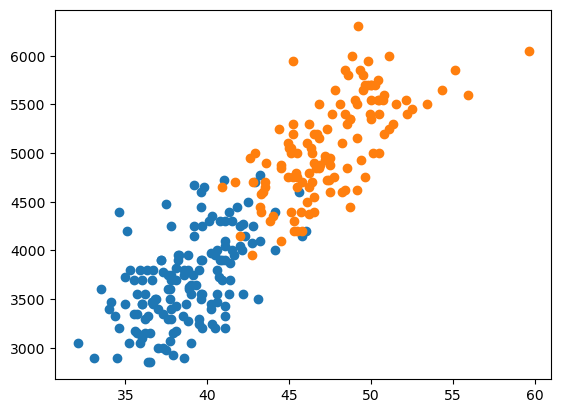

In [12]:
# We use a mask to pull all rows that are not chinstrap
cols = ["bill_length_mm", "body_mass_g", "species"]
adelie = penguins.loc[penguins["species"] == "Adelie",cols]
gentoo = penguins.loc[penguins["species"] == "Gentoo",cols]

# Pull the columns that we want from the data set 

# Let's plot these!!
ax, fig = plt.subplots()

fig.scatter(adelie.loc[:, "bill_length_mm"], adelie.loc[:, "body_mass_g"])
fig.scatter(gentoo.loc[:, "bill_length_mm"], gentoo.loc[:, "body_mass_g"])

## Split the Training and testing set<a href="#Split-the-Training-and-testing-set" class="anchor-link">¶</a>

We will do our cross validation on the training set and do a final
evlauation using our testing set.

In [13]:
# Make our X variable, which will include all of the predictor 
# attributes (bill_legnth and body_mass)
# and y will include the target attributes (species)

penguins_no_chinstrap = pd.concat([adelie, gentoo])
penguins_no_chinstrap = penguins_no_chinstrap.dropna()

X = penguins_no_chinstrap.loc[:,["bill_length_mm", "body_mass_g"]]
y = penguins_no_chinstrap.loc[:,"species"]


Let's do one simple crossvalidation for one parameter (`C=1`)

In [14]:
from sklearn.svm import LinearSVC
from sklearn.model_selection import train_test_split, cross_val_score

X_train, X_test, y_train, y_test = train_test_split(
    X, y, test_size=0.2, random_state=0)

# Setting up our model 
model = LinearSVC(C=1, random_state=42)

scores = cross_val_score(model, X, y, cv=5)

# Each one of these values corresponds to the accuracy of 
# testing the model on the validation set 
scores

array([0.92727273, 0.94545455, 0.94545455, 0.94545455, 1.        ])

## Hyper parameter tuning!

In [15]:
c_values = range(1, 10)

# Use this to store our results
scores = np.ones((len(c_values), 5))

for (i,c_candidate) in enumerate(c_values):
    print("Cross validating for %d..." % c_candidate)

    # Initializing our model with the given C value 
    model = LinearSVC(C=c_candidate, random_state=42)
    current_scores = cross_val_score(model, X, y, cv=5)
    scores[i] = current_scores

scores

Cross validating for 1...
Cross validating for 2...
Cross validating for 3...
Cross validating for 4...
Cross validating for 5...
Cross validating for 6...
Cross validating for 7...
Cross validating for 8...
Cross validating for 9...


array([[0.92727273, 0.94545455, 0.94545455, 0.94545455, 1.        ],
       [0.92727273, 0.94545455, 0.96363636, 0.94545455, 1.        ],
       [0.94545455, 0.94545455, 0.96363636, 0.94545455, 1.        ],
       [0.94545455, 0.94545455, 0.96363636, 0.94545455, 1.        ],
       [0.94545455, 0.94545455, 0.96363636, 0.94545455, 0.98148148],
       [0.92727273, 0.94545455, 0.96363636, 0.94545455, 1.        ],
       [0.92727273, 0.94545455, 0.96363636, 0.94545455, 1.        ],
       [0.92727273, 0.94545455, 0.96363636, 0.94545455, 0.98148148],
       [0.92727273, 0.94545455, 0.96363636, 0.94545455, 0.98148148]])

{'whiskers': [<matplotlib.lines.Line2D at 0x173d2a210>,
 'caps': [<matplotlib.lines.Line2D at 0x174a6d810>,
 'boxes': [<matplotlib.lines.Line2D at 0x173d2a5d0>,
 'medians': [<matplotlib.lines.Line2D at 0x174a6d450>,
 'fliers': [<matplotlib.lines.Line2D at 0x174a6d1d0>,
 'means': []}

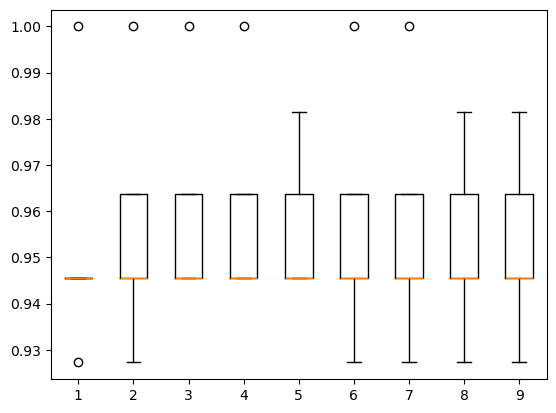

In [16]:
plt.boxplot(scores.T)